### Load csv file

In [59]:
import pandas as pd
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Remove punctuation on data

In [60]:
df = df.replace(r'[^\w\s]+', '')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Check info of dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Column CustomerID and Description has missing values
#### So we count all of it and use dropna() to drop them

In [62]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Drop NA values

In [63]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### Then, we use describe() to show details of data, make sure that there is nothing out of the ordinary in this data set

In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## There are several types of peculiar transactions and list all special Stock Codes

In [65]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [66]:
df[df['StockCode'].apply(lambda x: x in list_special_codes)]
df = df[~df['StockCode'].isin(list_special_codes)].sort_index()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Generate Total Price columns based on Quantity and UnitPrice, after that, drop Quantity and UnitPrice column

In [67]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### In this dataset, there are transactions where the customer cancels the order. Its means that the transactions when the customer orders must also be processed or dropped according to the canceled transactions. This is to ensure that revenue statistics will not be affected by those transactions

In [68]:
df1 = df.groupby(["Description","CustomerID","Country",])["Total Price"].sum().reset_index()
df1

,Description,CustomerID,Country,Total Price
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79
...,...,...,...,...
268434,ZINC WIRE SWEETHEART LETTER TRAY,17530.0,United Kingdom,3.75
268435,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50
268436,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75
268437,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25


In [69]:
df_merge = df[["InvoiceNo", "StockCode","Description", "InvoiceDate", "CustomerID", "Quantity"]].sort_values(by="CustomerID",ascending=True)
df_merge

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Quantity
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:17:00,12346.0,-74215
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:01:00,12346.0,74215
148302,549222,21731,RED TOADSTOOL LED NIGHT LIGHT,2011-04-07 10:43:00,12347.0,12
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,2011-10-31 12:25:00,12347.0,12
428972,573511,22697,GREEN REGENCY TEACUP AND SAUCER,2011-10-31 12:25:00,12347.0,12
...,...,...,...,...,...,...
198716,554065,22755,SMALL PURPLE BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287.0,12
198717,554065,22754,SMALL RED BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287.0,12
198718,554065,22753,SMALL YELLOW BABUSHKA NOTEBOOK,2011-05-22 10:39:00,18287.0,12
392739,570715,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,2011-10-12 10:23:00,18287.0,24


### I merge 2 data frames to combined multi columns need to use later

In [70]:
df2 = pd.merge(df1,df_merge,how='outer')
df2

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
...,...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00,4
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00,1
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00,5
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841.0,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00,2


In [71]:
df_negative = df1[df1["Total Price"] <= 0]
df_negative

,Description,CustomerID,Country,Total Price
159,DOLLY GIRL BEAKER,12940.0,United Kingdom,-1.25
505,SET 2 TEA TOWELS I LOVE LONDON,15128.0,United Kingdom,0.00
659,SPACEBOY BABY GIFT SET,15810.0,United Kingdom,0.00
667,SPACEBOY BABY GIFT SET,16360.0,United Kingdom,0.00
714,TRELLIS COAT RACK,15993.0,United Kingdom,0.00
...,...,...,...,...
267589,ZINC METAL HEART DECORATION,13394.0,United Kingdom,0.00
267947,ZINC SWEETHEART WIRE LETTER RACK,17716.0,United Kingdom,0.00
268245,ZINC T-LIGHT HOLDER STARS SMALL,17504.0,United Kingdom,0.00
268264,ZINC TOP 2 DOOR WOODEN SHELF,14217.0,United Kingdom,0.00


### After calculating total price based on CustomerID and StockCode. Then, drop the data with total price <= 0 (because it includes unreasonable transactions with order cancellation data even though there is no previous order data)

In [72]:
df3= df2[~df2["Total Price"].isin(df_negative["Total Price"])]
df3

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
...,...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00,4
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00,1
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00,5
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841.0,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00,2


### Show the data with duplicate CustomerID. Then we group all duplicate descriptions based on CustomerID, then, we join to the new column is All Description

In [73]:
df_dup = df3[df3["CustomerID"].duplicated(keep=False)]
df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)
df3.head()

C:\Users\THINH\AppData\Local\Temp/ipykernel_14480/1505957312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)


,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All StockCode
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1,"72800B, 22150, 22077, 85177, 22588, 22816, 229..."
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ..."
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6,"72800B, 72800C, 23485, 23458, 48194, 23284, 48..."
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12,"72800B, 72800C, 22915, 84879, 22138, 23417, 22..."
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8..."


### After join all descriptions into the new column, we drop all redundant rows with duplicate

In [74]:
df_dup = df3[[ "InvoiceNo", "CustomerID","All StockCode","InvoiceDate", "Country"]].drop_duplicates()
df_dup

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country
0,578551,12937.0,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom
1,571270,12940.0,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom
2,579533,12953.0,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom
3,581015,13949.0,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom
4,580876,14071.0,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom
...,...,...,...,...,...
404008,C555267,16359.0,84836,2011-06-01 16:15:00,United Kingdom
404425,C571319,17164.0,23145,2011-10-17 10:50:00,United Kingdom
404513,562050,14133.0,23144,2011-08-02 11:34:00,United Kingdom
404570,552135,14944.0,23144,2011-05-06 11:51:00,United Kingdom


## Generate new data frame to merge with initial data frame based on InvoiceNo column

In [75]:
df4 = df3.groupby(["InvoiceNo"])["Total Price"].sum().reset_index()
df4

,InvoiceNo,Total Price
0,536365,2506.04
1,536366,399.60
2,536367,684.53
3,536368,172.05
4,536369,53.55
...,...,...
21085,C581468,203.40
21086,C581470,196.08
21087,C581490,1223.18
21088,C581568,505.50


In [76]:
df_dup2 = pd.merge(df_dup,df4,on='InvoiceNo')
df_dup2["InvoiceNo"] = df_dup2["InvoiceNo"].replace('C', '', regex=True)
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price
0,578551,12937.0,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69
1,571270,12940.0,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97
2,579533,12953.0,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85
3,581015,13949.0,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42
4,580876,14071.0,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42
...,...,...,...,...,...,...
21127,555267,16359.0,84836,2011-06-01 16:15:00,United Kingdom,740.21
21128,571319,17164.0,23145,2011-10-17 10:50:00,United Kingdom,21.85
21129,562050,14133.0,23144,2011-08-02 11:34:00,United Kingdom,19.92
21130,552135,14944.0,23144,2011-05-06 11:51:00,United Kingdom,59.76


## Apply RFM analysis to group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns

In [77]:
most_recent_date = df_dup2["InvoiceDate"].max()
rfm_data = df_dup2.groupby(by='CustomerID').aggregate({
    'InvoiceDate' : lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo' : lambda x: len(x),
    'Total Price' : lambda x: sum(x)
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary Total']
rfm_data

,Recency,Frequency,Monetary Total
CustomerID,,,
12347.0,1,7,11323.81
12348.0,74,4,2181.64
12349.0,18,1,1457.55
12350.0,309,1,294.40
12352.0,35,8,2122.87
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,189.07


In [78]:
from sklearn.preprocessing import StandardScaler
rfm_data_scale = StandardScaler()
rfm_data_scale = rfm_data_scale.fit_transform(rfm_data) 
rfm_data_scale = rfm_data_scale.tolist()

df_rfm_data_scale = pd.DataFrame (rfm_data_scale, columns = ['Recency', 'Frequency', 'Monetary Total'])
df_rfm_data_scale

,Recency,Frequency,Monetary Total
0,-0.895386,0.234183,0.080973
1,-0.163859,-0.098684,-0.087159
2,-0.725030,-0.431552,-0.100476
3,2.191056,-0.431552,-0.121867
4,-0.554675,0.345139,-0.088240
...,...,...,...
4317,1.870387,-0.431552,-0.123960
4318,0.898358,-0.431552,-0.125795
4319,-0.835260,-0.209640,-0.123804
4320,-0.875344,1.232784,0.080547


## Clustering by Kmeans

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

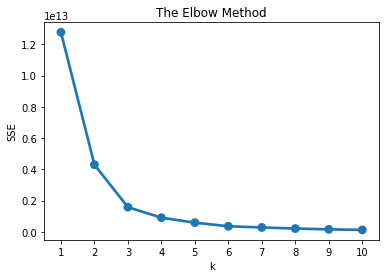

In [80]:
sse = {}

for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)    
    kmeans.fit(rfm_data)    
    sse[k] = kmeans.inertia_ 
    
# Plot SSE for each value of k    
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

on the graph above, k = 3 is optimal

In [81]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [82]:
y_predicted = km.fit_predict(df_rfm_data_scale[['Frequency', 'Monetary Total']]) 
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
rfm_data['cluster_Kmeans'] = y_predicted
rfm_data.head()

,Recency,Frequency,Monetary Total,cluster_Kmeans
CustomerID,,,,
12347.0,1,7,11323.81,0
12348.0,74,4,2181.64,0
12349.0,18,1,1457.55,0
12350.0,309,1,294.40,0
12352.0,35,8,2122.87,0


In [84]:
rfm_data["cluster_Kmeans"].value_counts()

0    4148
2     165
1       9
Name: cluster_Kmeans, dtype: int64

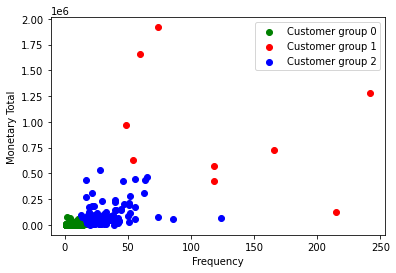

In [85]:
import matplotlib.pyplot as plt

rfm_data_cluster0 =rfm_data[y_predicted==0]
rfm_data_cluster1 =rfm_data[y_predicted==1]
rfm_data_cluster2 =rfm_data[y_predicted==2]


plt.scatter(rfm_data_cluster0["Frequency"], rfm_data_cluster0["Monetary Total"], color='green', label = 'Customer group 0')
plt.scatter(rfm_data_cluster1["Frequency"], rfm_data_cluster1["Monetary Total"], color='red', label = 'Customer group 1')
plt.scatter(rfm_data_cluster2["Frequency"], rfm_data_cluster2["Monetary Total"], color='blue', label = 'Customer group 2')

plt.xlabel('Frequency')
plt.ylabel('Monetary Total')
plt.legend()
plt.show()

In [86]:
rfm_data.reset_index()

,CustomerID,Recency,Frequency,Monetary Total,cluster_Kmeans
0,12347.0,1,7,11323.81,0
1,12348.0,74,4,2181.64,0
2,12349.0,18,1,1457.55,0
3,12350.0,309,1,294.40,0
4,12352.0,35,8,2122.87,0
...,...,...,...,...,...
4317,18280.0,277,1,180.60,0
4318,18281.0,180,1,80.82,0
4319,18282.0,7,3,189.07,0
4320,18283.0,3,16,11300.63,0


In [87]:
rfm_data0 = rfm_data[rfm_data["cluster_Kmeans"] == 0]
rfm_data1 = rfm_data[rfm_data["cluster_Kmeans"] == 1]
rfm_data2 = rfm_data[rfm_data["cluster_Kmeans"] == 2]
rfm_data0

,Recency,Frequency,Monetary Total,cluster_Kmeans
CustomerID,,,,
12347.0,1,7,11323.81,0
12348.0,74,4,2181.64,0
12349.0,18,1,1457.55,0
12350.0,309,1,294.40,0
12352.0,35,8,2122.87,0
...,...,...,...,...
18280.0,277,1,180.60,0
18281.0,180,1,80.82,0
18282.0,7,3,189.07,0


In [88]:
rfm_data1

,Recency,Frequency,Monetary Total,cluster_Kmeans
CustomerID,,,,
12748.0,0,215,123333.74,1
13089.0,2,118,429409.68,1
14646.0,1,74,1917875.79,1
14911.0,0,242,1276621.07,1
15061.0,3,54,632029.00,1
15311.0,0,118,570022.70,1
17450.0,7,49,969646.22,1
17841.0,1,166,722964.59,1
18102.0,0,60,1655153.96,1


In [89]:
rfm_data2

,Recency,Frequency,Monetary Total,cluster_Kmeans
CustomerID,,,,
12415.0,23,22,309810.78,2
12431.0,35,26,25680.02,2
12437.0,1,19,12535.89,2
12471.0,1,45,155947.88,2
12474.0,16,27,20336.55,2
...,...,...,...,...
18118.0,10,31,30864.09,2
18172.0,14,25,26039.53,2
18198.0,3,21,32839.73,2


In [90]:
rfm_data0 = rfm_data0.reset_index()
rfm_data1 = rfm_data1.reset_index()
rfm_data2 = rfm_data2.reset_index()
rfm_data = rfm_data.reset_index()

Create new data frame to store CustomerID of each cluster 0,1,2 and with no cluster

In [91]:
data_fpgrowth_0 = rfm_data0["CustomerID"]

In [92]:
data_fpgrowth_1 = rfm_data1["CustomerID"]

In [93]:
data_fpgrowth_2 = rfm_data2["CustomerID"]

In [94]:
data_fpgrowth_without_cluster = rfm_data["CustomerID"]

Filter all data of CustomerID corresponding with each cluster

In [95]:
df_cluster0 = df3[df3["CustomerID"].isin(data_fpgrowth_0)]
df_cluster0 = df_cluster0.drop(columns = "All StockCode")
df_cluster0

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
...,...,...,...,...,...,...,...,...
404915,ZINC WIRE SWEETHEART LETTER TRAY,16750.0,United Kingdom,3.75,550965,23137,2011-04-21 16:53:00,1
404916,ZINC WIRE SWEETHEART LETTER TRAY,17290.0,United Kingdom,7.50,578307,23137,2011-11-23 15:53:00,2
404917,ZINC WIRE SWEETHEART LETTER TRAY,17530.0,United Kingdom,3.75,573152,23137,2011-10-27 20:16:00,1
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00,1


In [96]:
df_cluster1 = df3[df3["CustomerID"].isin(data_fpgrowth_1)]
df_cluster1 = df_cluster1.drop(columns = "All StockCode")
df_cluster1

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
30,4 PURPLE FLOCK DINNER CANDLES,17841.0,United Kingdom,2.55,545186,72800B,2011-02-28 15:05:00,1
46,50'S CHRISTMAS GIFT BAG LARGE,12748.0,United Kingdom,10.00,570214,23437,2011-10-09 11:50:00,8
86,50'S CHRISTMAS GIFT BAG LARGE,14911.0,EIRE,60.00,568095,23437,2011-09-23 14:49:00,48
177,DOLLY GIRL BEAKER,13089.0,United Kingdom,15.00,564958,23345,2011-08-31 13:56:00,12
215,DOLLY GIRL BEAKER,14646.0,Netherlands,1297.25,563165,23345,2011-08-12 12:36:00,200
...,...,...,...,...,...,...,...,...
404804,ZINC WILLIE WINKIE CANDLE STICK,15311.0,United Kingdom,17.85,552574,84832,2011-05-10 12:20:00,2
404805,ZINC WILLIE WINKIE CANDLE STICK,15311.0,United Kingdom,17.85,536381,84832,2010-12-01 09:41:00,1
404911,ZINC WIRE SWEETHEART LETTER TRAY,14911.0,EIRE,10.00,581003,23137,2011-12-07 08:38:00,8
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841.0,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00,2


In [97]:
df_cluster2 = df3[df3["CustomerID"].isin(data_fpgrowth_2)]
df_cluster2 = df_cluster2.drop(columns = "All StockCode")
df_cluster2

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
6,4 PURPLE FLOCK DINNER CANDLES,14156.0,EIRE,15.30,579553,72800B,2011-11-30 10:54:00,6
21,4 PURPLE FLOCK DINNER CANDLES,16779.0,United Kingdom,9.48,581168,72800B,2011-12-07 14:52:00,12
25,4 PURPLE FLOCK DINNER CANDLES,17315.0,United Kingdom,40.08,577833,72800B,2011-11-22 10:20:00,12
26,4 PURPLE FLOCK DINNER CANDLES,17315.0,United Kingdom,40.08,581345,72800B,2011-12-08 12:15:00,12
41,50'S CHRISTMAS GIFT BAG LARGE,12540.0,Spain,15.00,571665,23437,2011-10-18 12:59:00,12
...,...,...,...,...,...,...,...,...
404903,ZINC WIRE KITCHEN ORGANISER,17706.0,United Kingdom,31.20,560035,23143,2011-07-14 13:41:00,3
404908,ZINC WIRE SWEETHEART LETTER TRAY,14088.0,United Kingdom,23.03,555401,23137,2011-06-02 17:51:00,7
404909,ZINC WIRE SWEETHEART LETTER TRAY,14298.0,United Kingdom,78.96,551351,23137,2011-04-28 10:20:00,24
404918,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,570342,23137,2011-10-10 12:26:00,6


In [98]:
df_cluster012 = df3[df3["CustomerID"].isin(data_fpgrowth_without_cluster)]
df_cluster012 = df_cluster012.drop(columns = "All StockCode")
df_cluster012.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1


## Before running in Java, we edit file of each cluster as below:

In [99]:
df_done_cluster0 = df_cluster0.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_done_cluster0.head(5)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df_done_cluster1 = df_cluster1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_done_cluster1

StockCode,10002,10120,10133,10135,11001,15030,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90204,90205A,90205C,90208,90211A,90214D
CustomerID,,,,,,,,,,,,,,,,,,,,,
12748.0,1.0,6.0,28.0,36.0,32.0,5.0,108.0,72.0,13.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
13089.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,32.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14646.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14911.0,12.0,0.0,20.0,60.0,16.0,0.0,0.0,24.0,0.0,0.0,...,6.0,6.0,6.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0
15061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17841.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df_done_cluster2 = df_cluster2.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_done_cluster2

StockCode,10002,10080,10120,10125,10133,10135,11001,15034,15036,15039,...,90214J,90214K,90214L,90214M,90214N,90214P,90214R,90214S,90214V,90214Y
CustomerID,,,,,,,,,,,,,,,,,,,,,
12415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18118.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df_done_cluster012 = df_cluster012.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_done_cluster012

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
def num(x):
    if x <= 0:
        return
    if x >= 1:
        return "t"

df_done_cluster0 = df_done_cluster0.applymap(num)
df_done_cluster0

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12348.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12349.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12350.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12352.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18281.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18282.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [104]:
def num(x):
    if x <= 0:
        return
    if x >= 1:
        return "t"

df_done_cluster1 = df_done_cluster1.applymap(num)
df_done_cluster1

StockCode,10002,10120,10133,10135,11001,15030,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90204,90205A,90205C,90208,90211A,90214D
CustomerID,,,,,,,,,,,,,,,,,,,,,
12748.0,t,t,t,t,t,t,t,t,t,None,...,None,None,None,None,t,None,None,t,t,t
13089.0,None,None,None,None,None,None,None,t,t,t,...,None,None,None,None,None,None,None,None,None,None
14646.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14911.0,t,None,t,t,t,None,None,t,None,None,...,t,t,t,t,None,t,t,None,None,None
15061.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
15311.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
17450.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
17841.0,None,None,None,None,None,None,None,None,t,t,...,None,None,None,None,None,None,None,None,None,None
18102.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [105]:
def num(x):
    if x <= 0:
        return
    if x >= 1:
        return "t"

df_done_cluster2 = df_done_cluster2.applymap(num)
df_done_cluster2

StockCode,10002,10080,10120,10125,10133,10135,11001,15034,15036,15039,...,90214J,90214K,90214L,90214M,90214N,90214P,90214R,90214S,90214V,90214Y
CustomerID,,,,,,,,,,,,,,,,,,,,,
12415.0,None,None,None,None,None,None,None,None,t,None,...,None,None,None,None,None,None,None,None,None,None
12431.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12437.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12471.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12474.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18118.0,None,None,None,None,t,t,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18172.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18198.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [106]:
def num(x):
    if x <= 0:
        return
    if x >= 1:
        return "t"

df_done_cluster012 = df_done_cluster012.applymap(num)
df_done_cluster012

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12348.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12349.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12350.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12352.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18281.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18282.0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Then, we export file to prepare convert to arff file to running in Java

In [107]:
# df_done_cluster0.to_csv("df_done_cluster0.csv")
# df_done_cluster1.to_csv("df_done_cluster1.csv")
# df_done_cluster2.to_csv("df_done_cluster2.csv")
# df_done_cluster012.to_csv("df_done_cluster012.csv")

## Evaluation

### First, we split CustomerID into csv file. Then, merge them to data original to get all data corresponding with each CustomerID of each cluster 

In [114]:
testcluster0 = pd.read_csv("testcluster0.csv")
testcluster1 = pd.read_csv("testcluster1.csv")
testcluster2 = pd.read_csv("testcluster2.csv")
testcluster012 = pd.read_csv("testcluster012.csv")

In [115]:
df_cluster0['CustomerID'] = df_cluster0['CustomerID'].astype(float)
df_cluster1['CustomerID'] = df_cluster1['CustomerID'].astype(float)
df_cluster2['CustomerID'] = df_cluster2['CustomerID'].astype(float)
df_cluster012['CustomerID'] = df_cluster012['CustomerID'].astype(float)

In [116]:
df_cluster0_test = df_cluster0[df_cluster0["CustomerID"].isin(testcluster0["CustomerID"])]
df_cluster0_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
5,4 PURPLE FLOCK DINNER CANDLES,14083.0,United Kingdom,5.10,554506,72800B,2011-05-24 15:22:00,2
7,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,1
8,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,4
11,4 PURPLE FLOCK DINNER CANDLES,15464.0,United Kingdom,2.55,540247,72800B,2011-01-05 15:56:00,1


In [117]:
df_cluster1_test = df_cluster1[df_cluster1["CustomerID"].isin(testcluster1["CustomerID"])]
df_cluster1_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
86,50'S CHRISTMAS GIFT BAG LARGE,14911.0,EIRE,60.00,568095,23437,2011-09-23 14:49:00,48
229,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,567378,23345,2011-09-20 10:01:00,12
230,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,571745,23345,2011-10-19 10:48:00,12
375,NINE DRAWER OFFICE TIDY,14911.0,EIRE,29.90,579069,23472,2011-11-28 10:31:00,2
416,OVAL WALL MIRROR DIAMANTE,14911.0,EIRE,69.65,542216,22167,2011-01-26 12:29:00,2


In [119]:
df_cluster2_test= df_cluster2[df_cluster2["CustomerID"].isin(testcluster2["CustomerID"])]
df_cluster2_test

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
6,4 PURPLE FLOCK DINNER CANDLES,14156.0,EIRE,15.30,579553,72800B,2011-11-30 10:54:00,6
43,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.00,564972,23437,2011-08-31 15:30:00,12
44,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.00,571658,23437,2011-10-18 12:48:00,12
124,50'S CHRISTMAS GIFT BAG LARGE,16931.0,United Kingdom,7.50,572291,23437,2011-10-23 12:46:00,6
157,DOLLY GIRL BEAKER,12471.0,Germany,45.00,574097,23345,2011-11-03 09:56:00,12
...,...,...,...,...,...,...,...,...
404747,ZINC WILLIE WINKIE CANDLE STICK,14156.0,EIRE,20.40,565748,84832,2011-09-06 12:38:00,24
404903,ZINC WIRE KITCHEN ORGANISER,17706.0,United Kingdom,31.20,560035,23143,2011-07-14 13:41:00,3
404909,ZINC WIRE SWEETHEART LETTER TRAY,14298.0,United Kingdom,78.96,551351,23137,2011-04-28 10:20:00,24
404918,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,570342,23137,2011-10-10 12:26:00,6


In [120]:
df_cluster012_test= df_cluster012[df_cluster012["CustomerID"].isin(testcluster012["CustomerID"])]
df_cluster012_test

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
13,4 PURPLE FLOCK DINNER CANDLES,15535.0,United Kingdom,5.10,557315,72800B,2011-06-19 16:02:00,2
16,4 PURPLE FLOCK DINNER CANDLES,15920.0,United Kingdom,7.65,559507,72800B,2011-07-08 15:22:00,2
...,...,...,...,...,...,...,...,...
404900,ZINC WIRE KITCHEN ORGANISER,16984.0,United Kingdom,10.40,562031,23143,2011-08-01 17:37:00,1
404906,ZINC WIRE SWEETHEART LETTER TRAY,13405.0,United Kingdom,15.00,553889,23137,2011-05-19 16:31:00,4
404911,ZINC WIRE SWEETHEART LETTER TRAY,14911.0,EIRE,10.00,581003,23137,2011-12-07 08:38:00,8
404916,ZINC WIRE SWEETHEART LETTER TRAY,17290.0,United Kingdom,7.50,578307,23137,2011-11-23 15:53:00,2


In [121]:
df_cluster0_test = df_cluster0_test[df_cluster0_test["CustomerID"].duplicated(keep=False)]
df_cluster0_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
5,4 PURPLE FLOCK DINNER CANDLES,14083.0,United Kingdom,5.10,554506,72800B,2011-05-24 15:22:00,2
7,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,1
8,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,4
11,4 PURPLE FLOCK DINNER CANDLES,15464.0,United Kingdom,2.55,540247,72800B,2011-01-05 15:56:00,1


In [122]:
df_cluster1_test = df_cluster1_test[df_cluster1_test["CustomerID"].duplicated(keep=False)]
df_cluster1_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
86,50'S CHRISTMAS GIFT BAG LARGE,14911.0,EIRE,60.00,568095,23437,2011-09-23 14:49:00,48
229,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,567378,23345,2011-09-20 10:01:00,12
230,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,571745,23345,2011-10-19 10:48:00,12
375,NINE DRAWER OFFICE TIDY,14911.0,EIRE,29.90,579069,23472,2011-11-28 10:31:00,2
416,OVAL WALL MIRROR DIAMANTE,14911.0,EIRE,69.65,542216,22167,2011-01-26 12:29:00,2


In [124]:
df_cluster2_test = df_cluster2_test[df_cluster2_test["CustomerID"].duplicated(keep=False)]
df_cluster2_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
6,4 PURPLE FLOCK DINNER CANDLES,14156.0,EIRE,15.3,579553,72800B,2011-11-30 10:54:00,6
43,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.0,564972,23437,2011-08-31 15:30:00,12
44,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.0,571658,23437,2011-10-18 12:48:00,12
124,50'S CHRISTMAS GIFT BAG LARGE,16931.0,United Kingdom,7.5,572291,23437,2011-10-23 12:46:00,6
157,DOLLY GIRL BEAKER,12471.0,Germany,45.0,574097,23345,2011-11-03 09:56:00,12


In [125]:
df_cluster012_test = df_cluster012_test[df_cluster012_test["CustomerID"].duplicated(keep=False)]
df_cluster012_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
13,4 PURPLE FLOCK DINNER CANDLES,15535.0,United Kingdom,5.10,557315,72800B,2011-06-19 16:02:00,2
16,4 PURPLE FLOCK DINNER CANDLES,15920.0,United Kingdom,7.65,559507,72800B,2011-07-08 15:22:00,2


In [126]:
df_cluster0_test["All Stock Code"] = df_cluster0_test.groupby(["CustomerID"])["StockCode"].transform(', '.join)
df_cluster0_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All Stock Code
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6,"72800B, 72800C, 23485, 23458, 48194, 23284, 48..."
5,4 PURPLE FLOCK DINNER CANDLES,14083.0,United Kingdom,5.10,554506,72800B,2011-05-24 15:22:00,2,"72800B, 22900, 22900, 22436, 22567, 22158, 229..."
7,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,1,"72800B, 72800B, 22418, 20973, 20975, 72800D, 7..."
8,4 PURPLE FLOCK DINNER CANDLES,14725.0,United Kingdom,12.75,576538,72800B,2011-11-15 12:42:00,4,"72800B, 72800B, 22418, 20973, 20975, 72800D, 7..."
11,4 PURPLE FLOCK DINNER CANDLES,15464.0,United Kingdom,2.55,540247,72800B,2011-01-05 15:56:00,1,"72800B, 22567, 22315, 22839, 22838, 22824, 229..."


In [127]:
df_cluster1_test["All Stock Code"] = df_cluster1_test.groupby(["CustomerID"])["StockCode"].transform(', '.join)
df_cluster1_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All Stock Code
86,50'S CHRISTMAS GIFT BAG LARGE,14911.0,EIRE,60.00,568095,23437,2011-09-23 14:49:00,48,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."
229,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,567378,23345,2011-09-20 10:01:00,12,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."
230,DOLLY GIRL BEAKER,14911.0,EIRE,30.00,571745,23345,2011-10-19 10:48:00,12,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."
375,NINE DRAWER OFFICE TIDY,14911.0,EIRE,29.90,579069,23472,2011-11-28 10:31:00,2,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."
416,OVAL WALL MIRROR DIAMANTE,14911.0,EIRE,69.65,542216,22167,2011-01-26 12:29:00,2,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."


In [128]:
df_cluster2_test["All Stock Code"] = df_cluster2_test.groupby(["CustomerID"])["StockCode"].transform(', '.join)
df_cluster2_test.head()

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All Stock Code
6,4 PURPLE FLOCK DINNER CANDLES,14156.0,EIRE,15.3,579553,72800B,2011-11-30 10:54:00,6,"72800B, 23007, 23411, 22418, 22418, 21447, 214..."
43,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.0,564972,23437,2011-08-31 15:30:00,12,"23437, 23437, 23438, 23438, 22418, 22418, 2097..."
44,50'S CHRISTMAS GIFT BAG LARGE,12621.0,Germany,30.0,571658,23437,2011-10-18 12:48:00,12,"23437, 23437, 23438, 23438, 22418, 22418, 2097..."
124,50'S CHRISTMAS GIFT BAG LARGE,16931.0,United Kingdom,7.5,572291,23437,2011-10-23 12:46:00,6,"23437, 22418, 22418, 20983, 22171, 22731, 2273..."
157,DOLLY GIRL BEAKER,12471.0,Germany,45.0,574097,23345,2011-11-03 09:56:00,12,"23345, 23345, 23345, 22964, 22964, 23375, 2337..."


In [129]:
df_cluster012_test["All Stock Code"] = df_cluster012_test.groupby(["CustomerID"])["StockCode"].transform(', '.join)
df_cluster012_test.head()

C:\Users\THINH\AppData\Local\Temp/ipykernel_14480/671283902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster012_test["All Stock Code"] = df_cluster012_test.groupby(["CustomerID"])["StockCode"].transform(', '.join)


,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All Stock Code
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1,"72800B, 22150, 22077, 85177, 22188, 47590A, 47..."
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12,"72800B, 22244, 72800C, 47503A, 22915, 84879, 8..."
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1,"72800B, 20973, 20975, 20974, 85034C, 22150, 22..."
13,4 PURPLE FLOCK DINNER CANDLES,15535.0,United Kingdom,5.10,557315,72800B,2011-06-19 16:02:00,2,"72800B, 72800D, 72800C, 82567, 82582, 85163B, ..."
16,4 PURPLE FLOCK DINNER CANDLES,15920.0,United Kingdom,7.65,559507,72800B,2011-07-08 15:22:00,2,"72800B, 72800B, 84558A, 35833P, 22251, 79337, ..."


In [130]:
df_cluster0_test = df_cluster0_test[["CustomerID", "All Stock Code"]].drop_duplicates()
df_cluster0_test

,CustomerID,All Stock Code
2,12953.0,"72800B, 72800C, 23485, 23458, 48194, 23284, 48..."
5,14083.0,"72800B, 22900, 22900, 22436, 22567, 22158, 229..."
7,14725.0,"72800B, 72800B, 22418, 20973, 20975, 72800D, 7..."
11,15464.0,"72800B, 22567, 22315, 22839, 22838, 22824, 229..."
12,15533.0,"72800B, 22839, 72800E, 35833P, 23353, 35819B, ..."
...,...,...
268273,17788.0,"22193, 22193, 22895, 22895"
274663,13130.0,"21154, 21035"
278454,12891.0,"21498, 21495, 21495"
291518,14300.0,"22081, 22736, 84832"


In [131]:
df_cluster1_test = df_cluster1_test[["CustomerID", "All Stock Code"]].drop_duplicates()
df_cluster1_test

,CustomerID,All Stock Code
86,14911.0,"23437, 23345, 23345, 23472, 22167, 22167, 2343..."


In [150]:
df_cluster2_test = df_cluster2_test[["CustomerID", "All Stock Code"]].drop_duplicates()
df_cluster2_test.head()

,CustomerID,All Stock Code
0,14156.0,72800B 23007 23411 22418 22418 21447 21447 229...
1,12621.0,23437 23437 23438 23438 22418 22418 20973 2097...
2,16931.0,23437 22418 22418 20983 22171 22731 22731 8455...
3,12471.0,23345 23345 23345 22964 22964 23375 23375 2207...
4,12683.0,23345 23345 22436 22620 22077 22951 84991 8499...


In [133]:
df_cluster012_test = df_cluster012_test[["CustomerID", "All Stock Code"]].drop_duplicates()
df_cluster012_test

,CustomerID,All Stock Code
0,12937.0,"72800B, 22150, 22077, 85177, 22188, 47590A, 47..."
3,13949.0,"72800B, 22244, 72800C, 47503A, 22915, 84879, 8..."
4,14071.0,"72800B, 20973, 20975, 20974, 85034C, 22150, 22..."
13,15535.0,"72800B, 72800D, 72800C, 82567, 82582, 85163B, ..."
16,15920.0,"72800B, 72800B, 84558A, 35833P, 22251, 79337, ..."
...,...,...
312099,12548.0,"84380, 84988, 21210, 21211"
331192,16659.0,"21078, 21090"
351533,12665.0,"21232, 21231, 21231"
370867,15100.0,"21258, 21258, 21258, 21258, 21258, 21258"


In [134]:
Condition_Result_0 = pd.read_csv("Condition_Result_0.csv")
Condition_Result_1 = pd.read_csv("Condition_result_1.csv")
Condition_Result_2 = pd.read_csv("Condition_Result_2.csv")
Condition_Result_012 = pd.read_csv("Condition_Result_012.csv")
Condition_Result_0

,Condition,Result
0,22699 22698,22697
1,22698,22697
2,22804,85123A
3,22697 22698,22699
4,22423 22697,22699
...,...,...
94,84879,85123A
95,85123A,21733
96,22423,22697
97,47566,22423


In [135]:
df_cluster0_test['All Stock Code'] = df_cluster0_test['All Stock Code'].str.replace(r'[^\w\s]+', '')
df_cluster1_test['All Stock Code'] = df_cluster1_test['All Stock Code'].str.replace(r'[^\w\s]+', '')
df_cluster2_test['All Stock Code'] = df_cluster2_test['All Stock Code'].str.replace(r'[^\w\s]+', '')
df_cluster012_test['All Stock Code'] = df_cluster012_test['All Stock Code'].str.replace(r'[^\w\s]+', '')

In [136]:
df_cluster0_test = df_cluster0_test.reset_index()
df_cluster1_test = df_cluster1_test.reset_index()
df_cluster2_test = df_cluster2_test.reset_index()
df_cluster012_test = df_cluster012_test.reset_index()

In [137]:
list_condition = []
list_result = []
for rule_index in range(len(Condition_Result_0['Condition'])):

    condition = []
    result = []
    for condition_index in range(len(Condition_Result_0['Condition'][rule_index].split())):
        for result_index in range(len(Condition_Result_0['Result'][rule_index].split())):
            condition.append(Condition_Result_0['Condition'][rule_index].split()[condition_index])
            result.append(Condition_Result_0['Result'][rule_index].split()[result_index])
    list_condition.append(set(condition))
    list_result.append(set(result))

In [138]:
list_condition_1 = []
list_result_1 = []
for rule_index_1 in range(len(Condition_Result_1['Condition'])):

    condition_1 = []
    result_1 = []
    for condition_index_1 in range(len(Condition_Result_1['Condition'][rule_index_1].split())):
        for result_index_1 in range(len(Condition_Result_1['Result'][rule_index_1].split())):
            condition_1.append(Condition_Result_1['Condition'][rule_index_1].split()[condition_index_1])
            result_1.append(Condition_Result_1['Result'][rule_index_1].split()[result_index_1])
    list_condition_1.append(set(condition_1))
    list_result_1.append(set(result_1))

In [139]:
list_condition_2 = []
list_result_2 = []
for rule_index_2 in range(len(Condition_Result_2['Condition'])):

    condition_2 = []
    result_2 = []
    for condition_index_2 in range(len(Condition_Result_2['Condition'][rule_index_2].split())):
        for result_index_2 in range(len(Condition_Result_2['Result'][rule_index_2].split())):
            condition.append(Condition_Result_2['Condition'][rule_index_2].split()[condition_index_2])
            result.append(Condition_Result_2['Result'][rule_index_2].split()[result_index_2])
    list_condition_2.append(set(condition_2))
    list_result_2.append(set(result_2))

In [140]:
list_condition_012 = []
list_result_012 = []
for rule_index_012 in range(len(Condition_Result_012['Condition'])):

    condition_012 = []
    result_012 = []
    for condition_index_012 in range(len(Condition_Result_012['Condition'][rule_index_012].split())):
        for result_index_012 in range(len(Condition_Result_012['Result'][rule_index_012].split())):
            condition_012.append(Condition_Result_012['Condition'][rule_index_012].split()[condition_index_012])
            result_012.append(Condition_Result_012['Result'][rule_index_012].split()[result_index_012])
    list_condition_012.append(set(condition_012))
    list_result_012.append(set(result_012))

In [141]:
accuracy = {sentences: [0] for sentences in range(len(df_cluster0_test))}
sum = len(Condition_Result_0)
for basket_index in range(len(df_cluster0_test)):
    list_stockcode = []

    for i in range(len(df_cluster0_test['All Stock Code'][basket_index].split())):
        list_stockcode.append(df_cluster0_test['All Stock Code'][basket_index].split()[i])

    count = 0 
    have_condition = 0
    for i in range(len(list_condition)):
        if (list_condition[i]).issubset(set(list_stockcode)):
            have_condition += 1
            if (list_result[i]).issubset(set(list_stockcode)):
                count += 1      
    if count == 0 and have_condition == 0:
        accuracy[basket_index] = 1
    else:
        accuracy[basket_index] = count/have_condition

In [142]:
accuracy_1 = {sentences: [0] for sentences in range(len(df_cluster1_test))}
sum_1 = len(Condition_Result_1)
for basket_index in range(len(df_cluster1_test)):
    list_stockcode_1 = []

    for i in range(len(df_cluster1_test['All Stock Code'][basket_index].split())):
        list_stockcode_1.append(df_cluster1_test['All Stock Code'][basket_index].split()[i])

    count_1 = 0 
    have_condition_1 = 0
    for i in range(len(list_condition)):
        if (list_condition[i]).issubset(set(list_stockcode_1)):
            have_condition_1 += 1
            if (list_result[i]).issubset(set(list_stockcode_1)):
                count_1 += 1      
    if count_1 == 0 and have_condition_1 == 0:
        accuracy_1[basket_index] = 1
    else:
        accuracy_1[basket_index] = count_1/have_condition_1

In [143]:
accuracy_2 = {sentences: [0] for sentences in range(len(df_cluster2_test))}
sum_2 = len(Condition_Result_2)
for basket_index in range(len(df_cluster2_test)):
    list_stockcode_2 = []

    for i in range(len(df_cluster2_test['All Stock Code'][basket_index].split())):
        list_stockcode_2.append(df_cluster2_test['All Stock Code'][basket_index].split()[i])

    count_2 = 0 
    have_condition_2 = 0
    for i in range(len(list_condition)):
        if (list_condition[i]).issubset(set(list_stockcode_2)):
            have_condition_2 += 1
            if (list_result[i]).issubset(set(list_stockcode_2)):
                count_2 += 1      
    if count_2 == 0 and have_condition_2 == 0:
        accuracy_2[basket_index] = 1
    else:
        accuracy_2[basket_index] = count_2/have_condition_2

In [144]:
accuracy_012 = {sentences: [0] for sentences in range(len(df_cluster012_test))}
sum_012 = len(Condition_Result_012)
for basket_index in range(len(df_cluster012_test)):
    list_stockcode_012 = []

    for i in range(len(df_cluster012_test['All Stock Code'][basket_index].split())):
        list_stockcode_012.append(df_cluster012_test['All Stock Code'][basket_index].split()[i])

    count_012 = 0 
    have_condition_012 = 0
    for i in range(len(list_condition)):
        if (list_condition[i]).issubset(set(list_stockcode_012)):
            have_condition_012 += 1
            if (list_result[i]).issubset(set(list_stockcode_012)):
                count_012 += 1      
    if count_012 == 0 and have_condition_012 == 0:
        accuracy_012[basket_index] = 1
    else:
        accuracy_012[basket_index] = count_012/have_condition_012

In [145]:
total_accuracy = 0
for i in range(len(accuracy)):
    total_accuracy += accuracy[i]
percent = total_accuracy/len(accuracy)
print('Model accuracy cluster 0: ', percent*100,'%')

Model accuracy cluster 0:  58.11166461767835 %


In [146]:
total_accuracy_1 = 0
for i in range(len(accuracy_1)):
    total_accuracy_1 += accuracy_1[i]
percent_1 = total_accuracy_1/len(accuracy_1)
print('Model accuracy cluster 1:', percent_1*100,'%')

Model accuracy cluster 1: 100.0 %


In [147]:
total_accuracy_2 = 0
for i in range(len(accuracy_2)):
    total_accuracy_2 += accuracy_2[i]
percent_2 = total_accuracy_2/len(accuracy_2)
print('Model accuracy cluster 2: ', percent_2*100,'%')

Model accuracy cluster 2:  63.48754214522986 %


In [148]:
total_accuracy_012 = 0
for i in range(len(accuracy_012)):
    total_accuracy_012 += accuracy_012[i]
percent_012 = total_accuracy_012/len(accuracy_012)
print('Model accuracy no cluster: ', percent_012*100,'%')

Model accuracy no cluster:  60.77960094026391 %


In [149]:
print('Model accuracy cluster 0: ', percent*100,'%')
print('Model accuracy cluster 1:', percent_1*100,'%')
print('Model accuracy cluster 2: ', percent_2*100,'%')
print('Model accuracy no cluster: ', percent_012*100,'%')

Model accuracy cluster 0:  58.11166461767835 %
Model accuracy cluster 1: 100.0 %
Model accuracy cluster 2:  63.48754214522986 %
Model accuracy no cluster:  60.77960094026391 %
